## 箱线图

箱线图提供了一种只用5个点对数据集做简单总结的方式，这5个点包括`中点`、`Q1`、`Q3`、部分状态的`高位`和`低位`。  
在`Q3+1.5IQR`和`Q1-1.5IQR`处画两条与中位数一样的线段，这两条线段为异常值截断点，称为`内限`；处于内限以外的点表示数据都是异常值。四分位距`IQR=Q3-Q1`矩形盒图向外绘制的线段表示的不是整个数据的最远点，表示该数据正常值的分布区间。

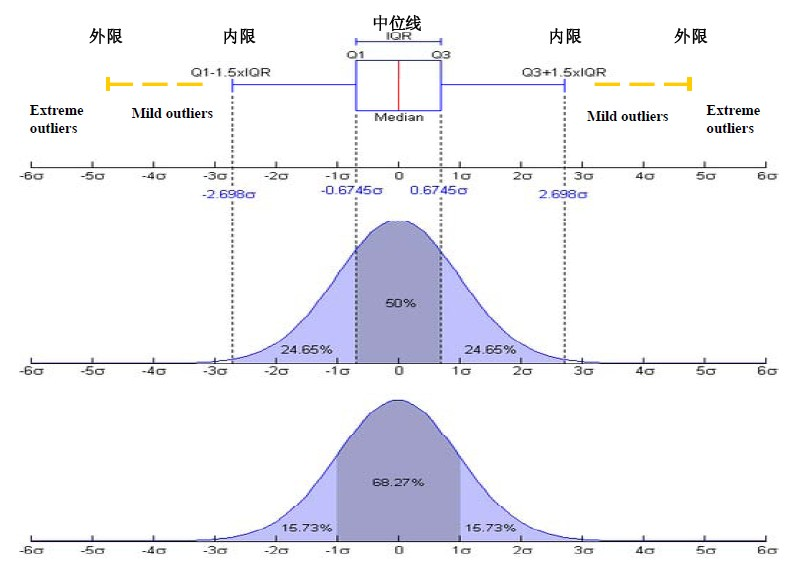

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style('white')

In [4]:
x = np.random.normal(0, 1, 1000)
x[:100]

array([-0.36419405, -0.57904526, -1.34788646,  1.42697111, -1.33552286,
        1.02216033, -0.87414136,  2.01624936, -0.15585864,  1.4927669 ,
       -0.09347728, -0.01488925, -0.3685529 ,  1.80718138, -0.76045057,
       -0.06741802, -1.5762854 , -2.95260665, -0.78060321,  0.21137101,
       -0.37875559, -1.77687056, -1.15976284,  2.35060802,  1.82660426,
        0.71867677,  1.19283775, -0.05816827,  0.13146767,  0.81300169,
       -0.48087628,  0.52874238, -0.39643982,  0.36933373,  0.70623724,
        0.05951508, -1.01389196, -0.65463232, -2.18327128, -0.45255634,
       -1.28913849,  1.47231253,  0.98003678, -0.15365224,  0.29946164,
       -1.38241138, -0.55123987, -0.32126751, -0.8617307 , -0.43180694,
       -0.34546237, -0.5720785 , -0.71308416,  0.58608996, -0.59314523,
       -0.47593747,  0.36197322,  2.10824191,  2.13277434, -1.83236432,
        0.00295423, -1.32898397,  0.35485023,  0.17626333,  0.16752035,
        0.24292923,  0.84496631, -0.23601509, -0.21984212, -0.73

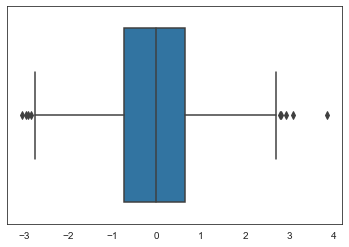

In [5]:
sns.boxplot(x)

## 箱线图对异常点的判断

$boxplot$ 提供了一个失败异常值的标准：异常值为区间$[Q1 - 1.5IQR, Q3 + 1.5IQR]$外的值

这个标准与判断异常值的经典方法不同，比如基于正态分布的$3σ$准则，这些方法需要假定数据服从正态分布，但实际的数据往往不严格服从正态分布，箱型图的绘制则依靠实际数据，不需要事先假定数据服从特定的分布形式

In [6]:
x = np.random.normal(0, 1, 1000)
y = np.append(np.random.normal(0, 1, 900), np.random.uniform(4, 5, 100))
df = pd.DataFrame({'x' : np.append(x, y), "dataset": np.append(['x']*1000, ['y']*1000)})
df.head()

,x,dataset
0,-0.364194,x
1,-0.579045,x
2,-1.347886,x
3,1.426971,x
4,-1.335523,x


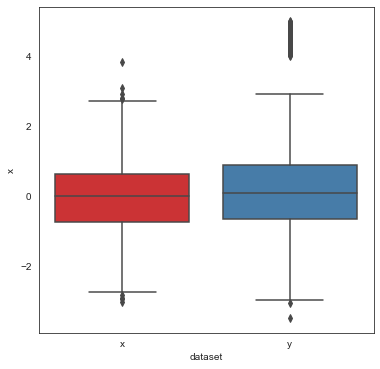

In [7]:
# 用 boxplot 比较两组数据的异常点分布情况

plt.figure(figsize=(6, 6))
sns.boxplot(x='dataset', y='x', data=df, palette='Set1')

### 与$3σ$准则异常值范围比较

> 把按照`3σ`准则所判断的正常值的范围以虚线的形式绘制在图中，会发现因为数据不是完全服从正态分布，异常值产生了很大的影响


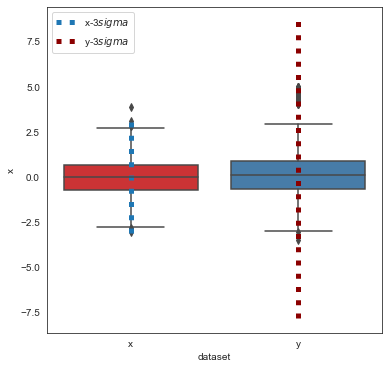

In [10]:
ux = np.mean(x)
uy = np.mean(y)
vx = np.var(x)
vy = np.var(y)

plt.figure(figsize=(6, 6))
sns.boxplot(x='dataset', y='x', data=df, palette='Set1')

plt.plot([0, 0], [ux-3*vx, ux+3*vx], linewidth=5, linestyle=':', label='x-3$sigma$')
plt.plot([1, 1], [uy-3*vy, uy+3*vy], color='darkred', linewidth=5, linestyle=':', label='y-3$sigma$')
plt.legend()

因为多达`25%`的数据可以变得任意远而不会很大的扰动四分位数，所以异常值对四分位数很难施加影响，箱型图识别异常值的效果比较客观

## 用箱线图比较数据的形状

> 使用箱线图，数据的中位数/尾长/异常值/分布区间/正常值的分布是集中还是分散等信息一目了然，非常适合比较不同类的数据

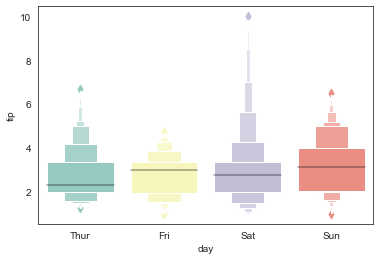

In [11]:
tips = sns.load_dataset('tips')
sns.boxenplot(x='day', y='tip', data=tips, palette='Set3')

从图中可以得出结论：周六异常高的小费是最多的，周岁的小费中位是最低的；周五的小费正常值分布最为集中，周日则最为分散

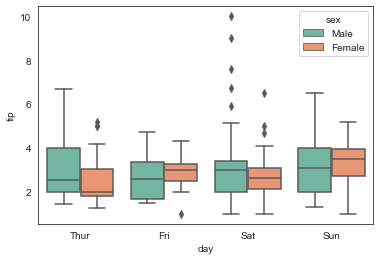

In [12]:
sns.boxplot(x='day', y='tip', data=tips, hue='sex', palette='Set2')

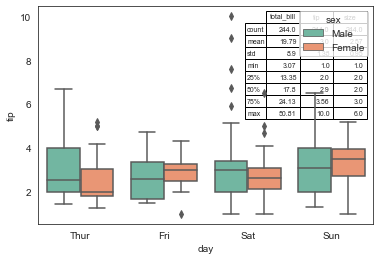

In [14]:
from pandas.plotting import table

fig, ax = plt.subplots(1, 1)

table(ax, np.round(tips.describe(), 2), loc='upper right', colWidths=[0.1, 0.1, 0.1])

sns.boxplot(x='day', y='tip', data=tips, hue='sex', palette='Set2')